# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [21]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [22]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/gdrive/My Drive/AIML/10thResidency/ACV_Project2/')

In [24]:
!ls

 Abdul_Face_recognition_Questions_Project2.ipynb
'Aligned Face Dataset.zip'
'Face recognition - Questions - Project - CV - AIML.ipynb'
 pins
 PINS
 vgg_face_weights.h5


### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
import zipfile

zip_ref = zipfile.ZipFile("Aligned Face Dataset.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [26]:
!ls

 Abdul_Face_recognition_Questions_Project2.ipynb
'Aligned Face Dataset.zip'
'Face recognition - Questions - Project - CV - AIML.ipynb'
 pins
 PINS
 vgg_face_weights.h5


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    if img is None:
      print("Can't load image, please check the path")
      return img
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [29]:
!ls  PINS

'pins_Aaron Paul'		 'pins_Josh Radnor'
'pins_alexandra daddario'	 'pins_kiernan shipka '
'pins_Alvaro Morte'		 'pins_Kit Harington'
'pins_alycia debnam carey face'  'pins_kristen stewart face'
'pins_Amanda Crew'		 'pins_Krysten Ritter'
'pins_Amaury Nolasco'		 'pins_Kumail Nanjiani'
'pins_amber heard face'		 'pins_lindsey morgan face'
'pins_Anna Gunn'		 'pins_Maisie Williams'
'pins_anne hathaway'		 'pins_margot robbie face'
'pins_barbara palvin face'	 'pins_maria pedraza'
'pins_bellamy blake face'	 'pins_Mark Ruffalo'
'pins_Benedict Cumberbatch'	 'pins_mark zuckerberg'
'pins_Betsy Brandt'		 'pins_Martin Starr'
'pins_bill gates'		 'pins_Melissa benoit'
'pins_Brenton Thwaites'		 'pins_miguel herran'
'pins_brie larson'		 'pins_Mike Colter'
'pins_Brit Marling'		 'pins_millie bobby brown'
'pins_Bryan Cranston'		 'pins_Morena Baccarin'
'pins_Caity Lotz'		 'pins_Morgan Freeman'
'pins_Cameron Monaghan'		 'pins_Natalie Portman '
'pins_chadwick boseman face'	 'pins_Neil Patrick Harris'
'pins_Chan

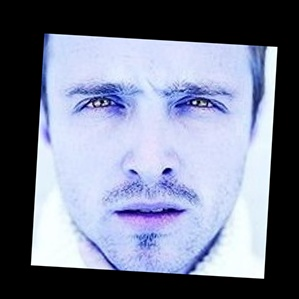

In [30]:
from google.colab.patches import cv2_imshow

image = load_image('/gdrive/My Drive/AIML/10thResidency/ACV_Project2/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg')
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
#print all images

#data_path="/content/drive/My Drive/AIML/acv/PINS"

#for root, dirs, files in os.walk(data_path, topdown=False):
#    for name in files:    
#      print(os.path.join(root, name))
#      image = load_image(os.path.join(root, name))
#      cv2_imshow(image)
#      cv2.waitKey(0)
#      cv2.destroyAllWindows()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [0]:
# Remove last Softmax layer and get model upto last flatten layer #with outputs 2622 units 

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [36]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
#import numpy as np
#embeddings =  np.zeros(157602 ,dtype = int)


#data_path="/content/drive/My Drive/AIML/acv/PINS"

#i = 0
#for root, dirs, files in os.walk(data_path, topdown=False):
#    for name in files:    
      #print(os.path.join(root, name))

      # Get embedding vector for the image in the metadata using the pre-trained model
#      img_path = metadata[i].image_path()
#      img = load_image(img_path)

#      if img is None:
#        embedding_vector = [0]*2622
#      else:
        #print(img.shape)
        
        # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
#        img = (img / 255.).astype(np.float32)
#        img = cv2.resize(img, dsize = (224,224))

        # Obtain embedding vector for an image
        # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
#        embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
#      embeddings = np.append(embeddings, embedding_vector)
#      print(name)
      #print(name, ":" , " shape: " ,img.shape, " emb vec: ", embedding_vector.shape)
#      i += 1

In [38]:
metadata.shape[0]

10770

In [0]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    if img is None:
      embeddings[i] = [0]*2622
    else:
      # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
      img = (img / 255.).astype(np.float32) 
      img = cv2.resize(img, dsize = (224,224))
      # obtain embedding vector for image
      embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

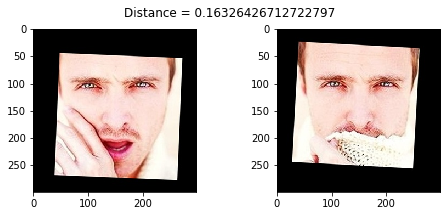

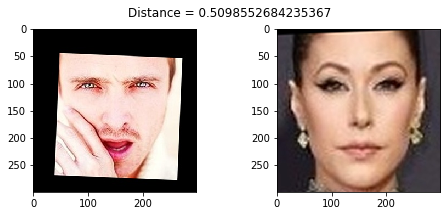

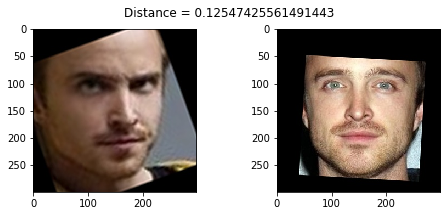

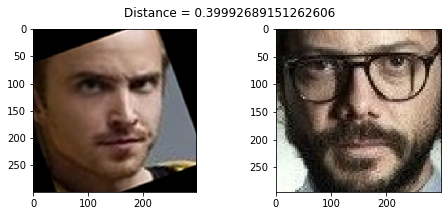

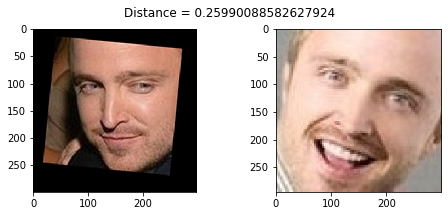

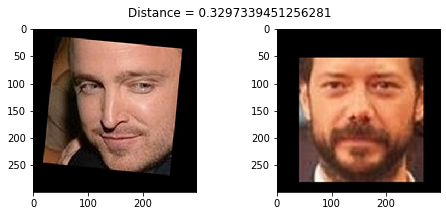

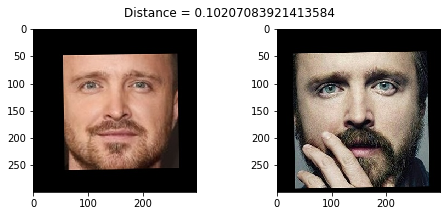

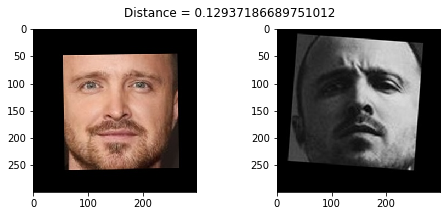

In [41]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2])}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

show_pair(77, 78)
show_pair(77, 50)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [43]:
train_idx.shape

(10770,)

In [0]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)

In [0]:
y_train = y[train_idx]
y_test = y[test_idx]

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [48]:
scaled_X_train.shape 

(9573, 2622)

In [49]:
scaled_X_test.shape

(1197, 2622)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

cov_matrix = np.cov(scaled_X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [51]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 13.58890703  18.98690264  22.97728235 ...  99.99999983  99.99999999
 100.        ]


In [52]:
cum_var_exp[250]

92.72308153201239

In [0]:
pca=PCA(n_components=250) 
pca.fit(scaled_X_train) 
X_pca_train=pca.fit_transform(scaled_X_train)
X_pca_test=pca.transform(scaled_X_test)

In [0]:
#np.array([(X_pca_train[:, i]**2).sum()/(scaled_X_train.shape[0]-1) for i in range(250)]).round(2)

In [55]:
print("pca explained variance:", pca.explained_variance_.round(2))

pca explained variance: [356.34 141.55 104.64  96.63  89.18  82.08  67.96  61.23  55.14  50.95
  47.69  44.61  43.48  40.96  37.1   35.75  34.19  32.19  30.29  29.75
  28.65  27.68  25.21  24.56  23.99  23.16  21.87  20.15  19.94  19.31
  18.35  17.43  16.61  16.27  15.    14.03  13.87  13.42  13.27  12.65
  11.5   11.39  10.34  10.32   9.71   9.35   8.93   8.77   8.61   8.39
   8.21   8.07   7.62   7.41   7.32   7.17   7.04   6.85   6.66   6.51
   6.22   6.08   5.9    5.69   5.53   5.4    5.25   5.1    4.92   4.85
   4.79   4.69   4.57   4.55   4.45   4.34   4.3    4.24   4.12   4.07
   4.     3.92   3.85   3.76   3.68   3.61   3.57   3.52   3.45   3.37
   3.33   3.27   3.24   3.22   3.17   3.13   3.12   3.06   3.04   2.92
   2.89   2.84   2.82   2.79   2.78   2.72   2.7    2.67   2.61   2.59
   2.53   2.5    2.47   2.44   2.43   2.4    2.38   2.35   2.31   2.28
   2.27   2.25   2.23   2.2    2.14   2.12   2.11   2.1    2.09   2.06
   2.02   2.01   2.01   1.99   1.97   1.93   1.93   1

In [56]:
print("no of principal components:", pca.n_components_)

no of principal components: 250


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [57]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_pca_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = svc.predict(X_pca_test)
acc_svc = accuracy_score(y_test, y_pred)
f1_svc = accuracy_score(y_test, y_pred)
print('SVM accuracy = ', acc_svc *100, ' f1 accuracy = ', f1_svc*100)

SVM accuracy =  37.25981620718463  f1 accuracy =  37.25981620718463


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Identified as  ['pins_Alvaro Morte']


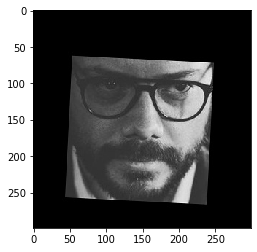

In [59]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([X_pca_test[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)

plt.imshow(example_image)
print('Identified as ', example_identity);